In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
import matplotlib.image as mpimg
import os

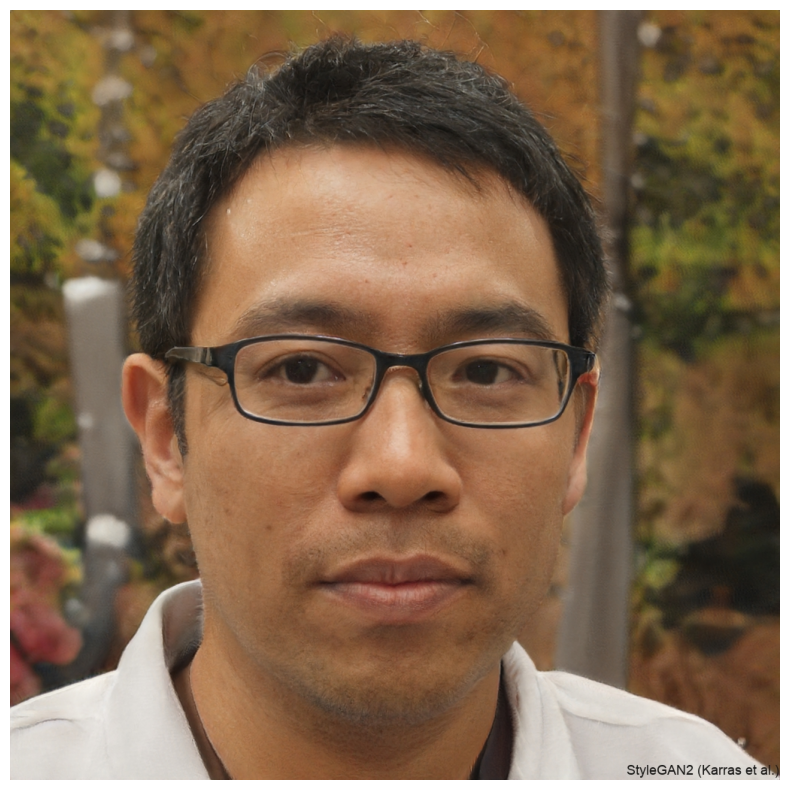

In [13]:
#load the image
img = mpimg.imread(r'D:\SEM4\ADA\images\thisperson.jpeg')
#show the image
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(img)
plt.show()


In [5]:
def show(image, nc):
  img = np.array(image.getdata()).reshape(*image.size, -1)
  pca_chan = {}
  img_t = np.transpose(img)
  for i in range(img.shape[-1]):
    img_chan = img_t[i]
    img_chan = img_chan / 255.0
    pca = PCA(random_state=6)
    fit = pca.fit_transform(img_chan)
    pca_chan[i] = (pca,fit)
  res = []
  for chan in range(len(pca_chan)):
    pca, fit = pca_chan[chan]
    pixels = fit[:,:nc]
    pca_comp = pca.components_[:nc,:]
    compressed = np.dot(pixels, pca_comp) + pca.mean_
    compressed = (compressed * 255).astype(np.uint8)
    res.append(compressed)
  img = np.transpose(res) #(c,w,h) -> (h,w,c)
  img = np.array(img, dtype=np.uint8)
  Image.fromarray(img).save('compressed.jpg')
  fig, (ax1, ax2) = pt.subplots(nrows=1, ncols=2)
  ax1.axis('off')
  ax2.axis('off')
  ax1.imshow(image)
  ax2.imshow(img)
  ax1.set_title(f"Original Image ({os.stat('ADA/images/thisperson.jpeg.jpg').st_size/1024:.2f} kb)")
  ax2.set_title(f"Compressed Image ({os.stat('ADA/images/compressed.jpg').st_size/1024:.2f} kb)")